In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

***Reading the dataset***

In [2]:
data = pd.read_excel('/content/drive/MyDrive/Digitain_task_Hovhannes_Arustamyan/Data_Science_Task_Dataset.xlsx')
pd.set_option('display.max_rows', 5000)
data.tail()

,UserID,UserFirstName,UserLastName,UserAge,UserGender,UserType,IsVerified,PlayedAmount,PlayedTimes,PlayedIndicator,City
11993,2913319,Vahe,Atanesyan,23.0,0.0,FreeRoller,0,0,0,0,C
11994,2116202,Edgar,Sahakyan,38.0,0.0,Medium,1,5000,1,1,C
11995,2116199,Arman,Gasparyan,27.0,0.0,Medium,0,1000,19,1,C
11996,2665628,Armen,Araqelyan,NaN,0.0,High Value,1,3500,4,1,C
11997,2116155,Razmik,Asatryan,NaN,0.0,VIP,1,158031,124,1,C


In [3]:
data.dtypes

UserID               int64
UserFirstName       object
UserLastName        object
UserAge            float64
UserGender         float64
UserType            object
IsVerified           int64
PlayedAmount         int64
PlayedTimes          int64
PlayedIndicator      int64
City                object
dtype: object

In [4]:
data.describe()

,UserID,UserAge,UserGender,IsVerified,PlayedAmount,PlayedTimes,PlayedIndicator
count,1.199800e+04,10198.000000,10535.000000,11998.000000,1.199800e+04,11998.000000,11998.000000
mean,8.434955e+06,34.876250,0.207499,0.749792,6.406433e+04,16.701617,0.666611
std,4.527937e+06,10.843398,0.405535,0.433151,5.100458e+05,55.933882,0.471444
min,2.116155e+06,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4.611853e+06,27.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,8.455870e+06,32.000000,0.000000,1.000000,9.500000e+02,1.000000,1.000000
75%,1.186282e+07,40.000000,0.000000,1.000000,9.880000e+03,10.000000,1.000000
max,1.889138e+07,101.000000,1.000000,1.000000,2.240000e+07,1957.000000,1.000000


***Exploration of Misssing values in each column***

In [5]:
data.isnull().sum()

UserID                0
UserFirstName         0
UserLastName          0
UserAge            1800
UserGender         1463
UserType            996
IsVerified            0
PlayedAmount          0
PlayedTimes           0
PlayedIndicator       0
City               2198
dtype: int64

***Visualization of Missing values in each column ( horizontal whitespaces are the Missing values )***

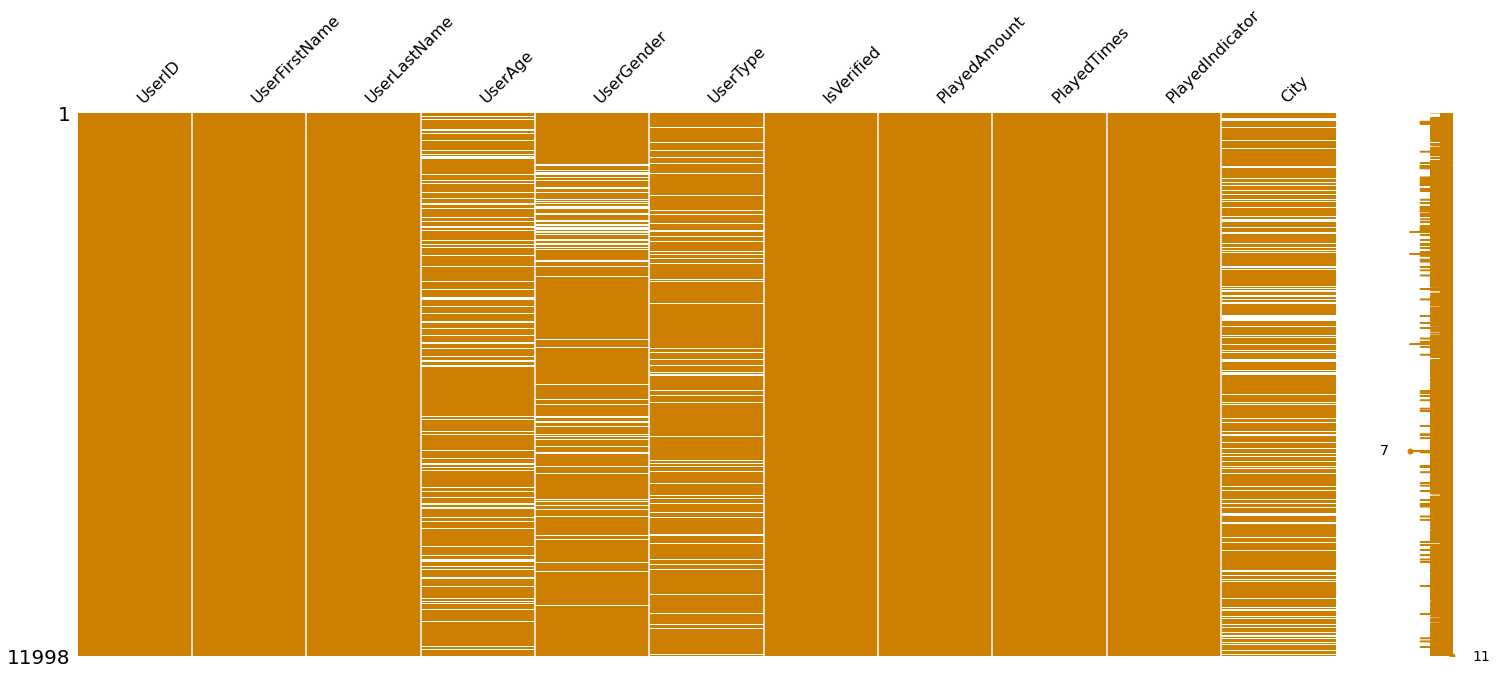

In [6]:
msno.matrix(data, color=(0.8, 0.5, 0))
plt.show()

***I will remove UserGender column, because it has more than 1000 missing values , and any imputing method can do many  mistakes , and I there is no point to manually fill by looking at person name and surname, so it would be dropped exactly.***

In [7]:
data = data.drop(['UserGender'], axis=1)

***Filling Nan values in UserAge column***

In [8]:
data['UserAge'] = data['UserAge'].fillna(data['UserAge'].mean())

***Filling Nan values in City column***

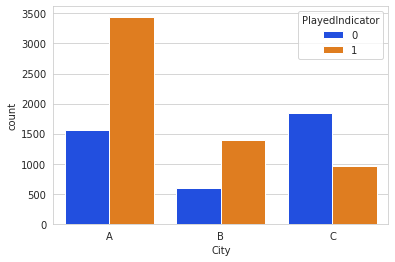

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='City', hue='PlayedIndicator',data=data, palette='bright')
plt.show()

***Looking at a graph above , we see that in the C city , mostly people don't play games, so using  this statistics I will handle Nan values in the City column***

In [10]:
list_ = []
for index, row in data.iterrows():
  if row['PlayedIndicator']==1 and row['City']!='B' and row['City']!='A' and row['City']!='C':
    list_.append((row['UserFirstName'], row['UserLastName']))
print(len(list_))    

2198


***We understand that Userers whos City is Nan they all played.So I will choose most frequent one***

In [11]:
data['City'] = data['City'].fillna("A")

In [12]:
data.describe()

,UserID,UserAge,IsVerified,PlayedAmount,PlayedTimes,PlayedIndicator
count,1.199800e+04,11998.000000,11998.000000,1.199800e+04,11998.000000,11998.000000
mean,8.434955e+06,34.876250,0.749792,6.406433e+04,16.701617,0.666611
std,4.527937e+06,9.996898,0.433151,5.100458e+05,55.933882,0.471444
min,2.116155e+06,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4.611853e+06,28.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,8.455870e+06,34.000000,1.000000,9.500000e+02,1.000000,1.000000
75%,1.186282e+07,38.000000,1.000000,9.880000e+03,10.000000,1.000000
max,1.889138e+07,101.000000,1.000000,2.240000e+07,1957.000000,1.000000


***I will not fill UserType column beacause I keep it as a ML model prediction column***

***Ploting some statistics***

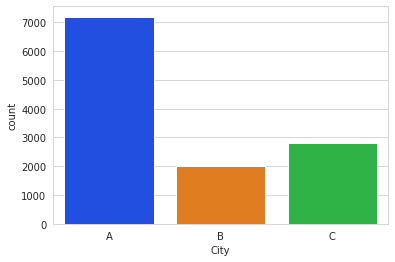

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='City', data=data, palette='bright')
plt.show()

***Visualization of PlayedIndicator column, which describes have user played and visualization of proportions by percentage***

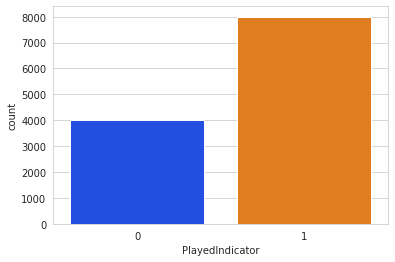

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='PlayedIndicator', data=data, palette='bright')
plt.show()

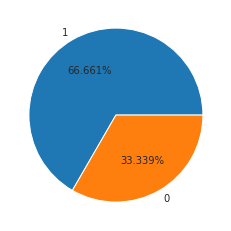

In [16]:
plt.pie([data['PlayedIndicator'].value_counts()[1], data['PlayedIndicator'].value_counts()[0]],
       autopct='%.3f%%', labels = data['PlayedIndicator'].unique())
plt.show()

***Visualization of users verification***

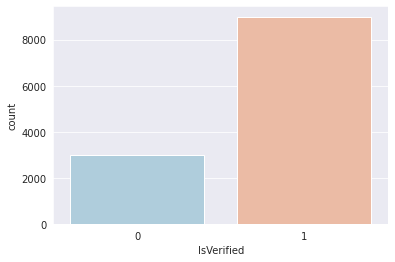

In [17]:
sns.set_style('darkgrid')
sns.countplot(x='IsVerified', data=data, palette='RdBu_r')
plt.show()

***Visualization of verified and unverified accounts count depends on the city***

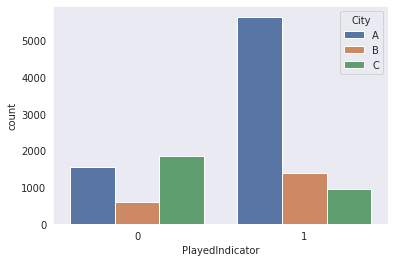

In [18]:
sns.set_style('dark')
sns.countplot(x='PlayedIndicator',hue='City', data=data, palette='deep')
plt.show()

## ***Visualization of our target , we can see that we have imbalanced data,, so we can't train a good model based on this data***

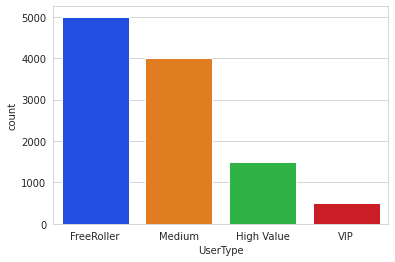

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='UserType', data=data, palette='bright')
plt.show()

***Selecting columns for the ML model creation  ***

In [19]:
new_data = data[["UserAge","PlayedAmount","PlayedTimes", "UserType"]]


***I will separate data into 3 parts. First and Second part will include only that rows , where aren't any Nan values. My prediction would be on third dataset  which I will call as final data ***

In [22]:
train_data = new_data[new_data['UserType'].notnull()]
final_data = new_data[new_data['UserType'].isnull()]

In [23]:
train_data

,UserAge,PlayedAmount,PlayedTimes,UserType
1,31.00000,6428,5,FreeRoller
3,35.00000,2000,1,Medium
4,48.00000,0,0,High Value
5,29.00000,32500,5,High Value
6,34.87625,84500,14,Medium
...,...,...,...,...
11993,23.00000,0,0,FreeRoller
11994,38.00000,5000,1,Medium
11995,27.00000,1000,19,Medium
11996,34.87625,3500,4,High Value


***Separating train data into X and Y***

In [24]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]
y

1        FreeRoller
3            Medium
4        High Value
5        High Value
6            Medium
            ...    
11993    FreeRoller
11994        Medium
11995        Medium
11996    High Value
11997           VIP
Name: UserType, Length: 11002, dtype: object

***Change from words to ordinal labels***

In [25]:
uniq_values = list(np.unique(y))
uniq_values

['FreeRoller', 'High Value', 'Medium', 'VIP']

In [27]:
list_ = [index for index,name in enumerate(uniq_values)]

In [28]:
y.replace(uniq_values, list_, inplace=True)

***Checking correlation between features***

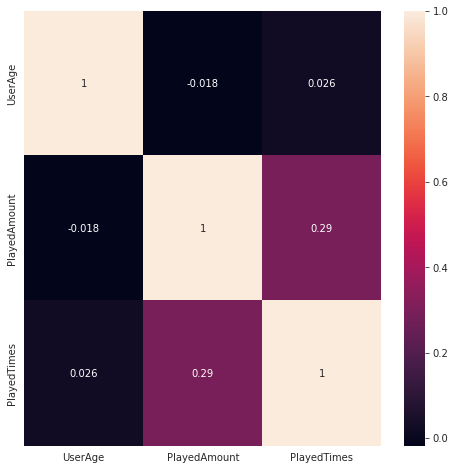

In [29]:
plt.figure(figsize=(8,8))
cor = X.corr()
sns.heatmap(cor, annot=True)
plt.show()

***Separating train data into 2 parts***

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4, test_size=0.25)

***Importing neccessary libraries doing Model creation and evaluation of scores***

In [32]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost 

***Scaling X features by StandardScaler***

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Experimenting different algorithms***

In [34]:
xgb_ = xgboost.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=5000,subsample=0.5,
                             colsample_bytree=0.5, eval_metric='auc', verbosity=1)
xgb_.fit(X_train_scaled, y_train)
y_pr = xgb_.predict(X_test_scaled)
print("XGBoost acccuracy for validation set is",accuracy_score(y_test, y_pr))

0.41366775717920756


In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_ = knn.predict(X_test_scaled)
print('KNN accuracy for validation is',accuracy_score(y_test, y_))

KNN accuracy for validation is 0.4005816066884769


In [37]:
gr_boost = GradientBoostingClassifier()
gr_boost.fit(X_train_scaled, y_train)
y_pred=gr_boost.predict(X_test_scaled)
print('Gradient boosting accuracy for validation is',accuracy_score(y_test, y_pred))

Gradient boosting accuracy for validation is 0.440567066521265


In [38]:
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
y_pred = ada.predict(X_test_scaled)
print("Adaboost accuracy score for validation is",accuracy_score(y_test, y_pred))

Adaboost accuracy score for validation is 0.44601962922573607


In [39]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)
print("Random forest accuracy for validation is", accuracy_score(y_test, y_pred))

Random forest accuracy for validation is 0.39185750636132316


In [40]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
print("Naive bayes accuracy for validation is", accuracy_score(y_test, y_pred_nb))

Naive bayes accuracy for validation is 0.4412940748818611


In [41]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Decision tree accuracy for validation is", accuracy_score(y_test, y_pred))

Decision tree accuracy for validation is 0.3802253725917848


# ***We wouldn't test further 3rd part of data because of underfitting , our data is imbalanced***